In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib
from scipy import signal
from statsmodels.stats.weightstats import ttest_ind
micron_conv = 0.01537697

In [26]:
exp_809 = pd.read_csv(r'C:\Users\sqjac\OneDrive\Desktop\08092024_master_sheet.csv')
exp_809 = exp_809.drop(exp_809[exp_809['Nuclear_Area (pixels)'] >= exp_809['Cell_Area (pixels)']].index)

exp_809["Cell_Area (pixels)"] = exp_809["Cell_Area (pixels)"] * micron_conv
exp_809["Nuclear_Area (pixels)"] = exp_809["Nuclear_Area (pixels)"] * micron_conv

exp_809["Bio rep"] = exp_809.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
exp_809["strain"] = exp_809.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)

exp_809["Bio rep"] = exp_809.apply(lambda x: x["Nuclei_File"][:-19], axis = 1)
exp_809["strain"] = exp_809.apply(lambda x: x["Nuclei_File"][:-21], axis = 1)

CA_bioreps_809 = exp_809.groupby('Bio rep').agg("Cell_Area (pixels)")#.agg({"Cell_Area (pixels)": lambda x: list(x)})
NA_bioreps_809 = exp_809.groupby('Bio rep').agg("Nuclear_Area (pixels)")
NFA_bioreps_809 = exp_809.groupby('Bio rep').agg("N:C_Ratio")
circ_bioreps_809 = exp_809.groupby('Bio rep').agg("circ.")
eccen_bioreps_809 = exp_809.groupby('Bio rep').agg("Eccentricity")
CA_strains_809 = exp_809.groupby('strain').agg("Cell_Area (pixels)")
NA_strains_809 = exp_809.groupby('strain').agg("Nuclear_Area (pixels)")
NFA_strains_809 = exp_809.groupby('strain').agg("N:C_Ratio")
circ_strains_809 = exp_809.groupby('strain').agg("circ.")
eccen_strains_809 = exp_809.groupby('strain').agg("Eccentricity")

In [80]:
CA_809_r1_0k_avg = CA_strains_809.get_group("08092024_r1_0k").mean()
CA_809_Or1_0k_avg = CA_strains_809.get_group("08092024_Or1_0k").mean()
CA_809_dps1_0k_avg = CA_strains_809.get_group("08092024_dps1_0k").mean()
CA_809_Odps1_0k_avg = CA_strains_809.get_group("08092024_Odps1_0k").mean()
CA_809_dps2_0k_avg = CA_strains_809.get_group("08092024_dps2_0k").mean()
CA_809_HU_0k_avg = CA_strains_809.get_group("08092024_HU_0k").mean()
CA_809_OHU_0k_avg = CA_strains_809.get_group("08092024_OHU_0k").mean()

CA_809_r1_0k_avg_sterr = CA_strains_809.get_group("08092024_r1_0k").sem()
CA_809_Or1_0k_avg_sterr = CA_strains_809.get_group("08092024_Or1_0k").sem()
CA_809_dps1_0k_avg_sterr = CA_strains_809.get_group("08092024_dps1_0k").sem()
CA_809_Odps1_0k_avg_sterr = CA_strains_809.get_group("08092024_Odps1_0k").sem()
CA_809_dps2_0k_avg_sterr = CA_strains_809.get_group("08092024_dps2_0k").sem()
CA_809_HU_0k_avg_sterr = CA_strains_809.get_group("08092024_HU_0k").sem()
CA_809_OHU_0k_avg_sterr = CA_strains_809.get_group("08092024_OHU_0k").sem()

CA_809_r1_10k_avg = CA_strains_809.get_group("08092024_r1_10k").mean()
CA_809_Or1_10k_avg = CA_strains_809.get_group("08092024_Or1_10k").mean()
CA_809_dps1_10k_avg = CA_strains_809.get_group("08092024_dps1_10k").mean()
CA_809_Odps1_10k_avg = CA_strains_809.get_group("08092024_Odps1_10k").mean()
CA_809_dps2_10k_avg = CA_strains_809.get_group("08092024_dps2_10k").mean()
CA_809_HU_10k_avg = CA_strains_809.get_group("08092024_HU_10k").mean()
CA_809_OHU_10k_avg = CA_strains_809.get_group("08092024_OHU_10k").mean()

CA_809_r1_10k_avg_sterr = CA_strains_809.get_group("08092024_r1_10k").sem()
CA_809_Or1_10k_avg_sterr = CA_strains_809.get_group("08092024_Or1_10k").sem()
CA_809_dps1_10k_avg_sterr = CA_strains_809.get_group("08092024_dps1_10k").sem()
CA_809_Odps1_10k_avg_sterr = CA_strains_809.get_group("08092024_Odps1_10k").sem()
CA_809_dps2_10k_avg_sterr = CA_strains_809.get_group("08092024_dps2_10k").sem()
CA_809_HU_10k_avg_sterr = CA_strains_809.get_group("08092024_HU_10k").sem()
CA_809_OHU_10k_avg_sterr = CA_strains_809.get_group("08092024_OHU_10k").sem()

CA_809_r1_0k_A_avg = CA_bioreps_809.get_group("08092024_r1_0k_A").mean()
CA_809_r1_0k_B_avg = CA_bioreps_809.get_group("08092024_r1_0k_B").mean()
CA_809_r1_0k_C_avg = CA_bioreps_809.get_group("08092024_r1_0k_C").mean()
CA_809_Or1_0k_A_avg = CA_bioreps_809.get_group("08092024_Or1_0k_A").mean()
CA_809_Or1_0k_B_avg = CA_bioreps_809.get_group("08092024_Or1_0k_B").mean()
CA_809_r1_10k_A_avg = CA_bioreps_809.get_group("08092024_r1_10k_A").mean()
CA_809_r1_10k_B_avg = CA_bioreps_809.get_group("08092024_r1_10k_B").mean()
CA_809_r1_10k_C_avg = CA_bioreps_809.get_group("08092024_r1_10k_C").mean()
CA_809_Or1_10k_A_avg = CA_bioreps_809.get_group("08092024_Or1_10k_A").mean()
CA_809_Or1_10k_B_avg = CA_bioreps_809.get_group("08092024_Or1_10k_B").mean()
CA_809_r1_0k_A_avg_sterr = CA_bioreps_809.get_group("08092024_r1_0k_A").sem()
CA_809_r1_0k_B_avg_sterr = CA_bioreps_809.get_group("08092024_r1_0k_B").sem()
CA_809_r1_0k_C_avg_sterr = CA_bioreps_809.get_group("08092024_r1_0k_C").sem()
CA_809_Or1_0k_A_avg_sterr = CA_bioreps_809.get_group("08092024_Or1_0k_A").sem()
CA_809_Or1_0k_B_avg_sterr = CA_bioreps_809.get_group("08092024_Or1_0k_B").sem()
CA_809_r1_10k_A_avg_sterr = CA_bioreps_809.get_group("08092024_r1_10k_A").sem()
CA_809_r1_10k_B_avg_sterr = CA_bioreps_809.get_group("08092024_r1_10k_B").sem()
CA_809_r1_10k_C_avg_sterr = CA_bioreps_809.get_group("08092024_r1_10k_C").sem()
CA_809_Or1_10k_A_avg_sterr = CA_bioreps_809.get_group("08092024_Or1_10k_A").sem()
CA_809_Or1_10k_B_avg_sterr = CA_bioreps_809.get_group("08092024_Or1_10k_B").sem()
CA_809_r1_A_avg_FC_10k_0k = CA_bioreps_809.get_group("08092024_r1_10k_A")/CA_809_r1_0k_A_avg
CA_809_r1_B_avg_FC_10k_0k = CA_bioreps_809.get_group("08092024_r1_10k_B")/CA_809_r1_0k_B_avg
CA_809_r1_C_avg_FC_10k_0k = CA_bioreps_809.get_group("08092024_r1_10k_C")/CA_809_r1_0k_C_avg
CA_809_Or1_A_avg_FC_10k_0k = CA_bioreps_809.get_group("08092024_Or1_10k_A")/CA_809_Or1_0k_A_avg
CA_809_Or1_B_avg_FC_10k_0k = CA_bioreps_809.get_group("08092024_Or1_10k_B")/CA_809_Or1_0k_B_avg

CA_809_dps1_0k_A_avg = CA_bioreps_809.get_group("08092024_dps1_0k_A").mean()
CA_809_Odps1_0k_A_avg = CA_bioreps_809.get_group("08092024_Odps1_0k_A").mean()
CA_809_dps1_10k_A_avg = CA_bioreps_809.get_group("08092024_dps1_10k_A").mean()
CA_809_Odps1_10k_A_avg = CA_bioreps_809.get_group("08092024_Odps1_10k_A").mean()
CA_809_dps1_A_avg_FC_10k_0k = CA_bioreps_809.get_group("08092024_dps1_10k_A")/CA_809_dps1_0k_A_avg
CA_809_Odps1_A_avg_FC_10k_0k = CA_bioreps_809.get_group("08092024_Odps1_10k_A")/CA_809_Odps1_0k_A_avg

CA_809_HU_0k_A_avg = CA_bioreps_809.get_group("08092024_HU_0k_A").mean()
CA_809_OHU_0k_A_avg = CA_bioreps_809.get_group("08092024_OHU_0k_A").mean()
CA_809_HU_10k_A_avg = CA_bioreps_809.get_group("08092024_HU_10k_A").mean()
CA_809_OHU_10k_A_avg = CA_bioreps_809.get_group("08092024_OHU_10k_A").mean()
CA_809_HU_A_avg_FC_10k_0k = CA_bioreps_809.get_group("08092024_HU_10k_A")/CA_809_HU_0k_A_avg
CA_809_OHU_A_avg_FC_10k_0k = CA_bioreps_809.get_group("08092024_OHU_10k_A")/CA_809_OHU_0k_A_avg

CA_809_dps2_0k_A_avg = CA_bioreps_809.get_group("08092024_dps2_0k_A").mean()
CA_809_dps2_10k_A_avg = CA_bioreps_809.get_group("08092024_dps2_10k_A").mean()
CA_809_dps2_A_avg_FC_10k_0k = CA_bioreps_809.get_group("08092024_dps2_10k_A")/CA_809_dps2_0k_A_avg


In [81]:
NA_809_r1_0k_avg = NA_strains_809.get_group("08092024_r1_0k").mean()
NA_809_Or1_0k_avg = NA_strains_809.get_group("08092024_Or1_0k").mean()
NA_809_dps1_0k_avg = NA_strains_809.get_group("08092024_dps1_0k").mean()
NA_809_Odps1_0k_avg = NA_strains_809.get_group("08092024_Odps1_0k").mean()
NA_809_dps2_0k_avg = NA_strains_809.get_group("08092024_dps2_0k").mean()
NA_809_HU_0k_avg = NA_strains_809.get_group("08092024_HU_0k").mean()
NA_809_OHU_0k_avg = NA_strains_809.get_group("08092024_OHU_0k").mean()

NA_809_r1_0k_avg_sterr = NA_strains_809.get_group("08092024_r1_0k").sem()
NA_809_Or1_0k_avg_sterr = NA_strains_809.get_group("08092024_Or1_0k").sem()
NA_809_dps1_0k_avg_sterr = NA_strains_809.get_group("08092024_dps1_0k").sem()
NA_809_Odps1_0k_avg_sterr = NA_strains_809.get_group("08092024_Odps1_0k").sem()
NA_809_dps2_0k_avg_sterr = NA_strains_809.get_group("08092024_dps2_0k").sem()
NA_809_HU_0k_avg_sterr = NA_strains_809.get_group("08092024_HU_0k").sem()
NA_809_OHU_0k_avg_sterr = NA_strains_809.get_group("08092024_OHU_0k").sem()

NA_809_r1_10k_avg = NA_strains_809.get_group("08092024_r1_10k").mean()
NA_809_Or1_10k_avg = NA_strains_809.get_group("08092024_Or1_10k").mean()
NA_809_dps1_10k_avg = NA_strains_809.get_group("08092024_dps1_10k").mean()
NA_809_Odps1_10k_avg = NA_strains_809.get_group("08092024_Odps1_10k").mean()
NA_809_dps2_10k_avg = NA_strains_809.get_group("08092024_dps2_10k").mean()
NA_809_HU_10k_avg = NA_strains_809.get_group("08092024_HU_10k").mean()
NA_809_OHU_10k_avg = NA_strains_809.get_group("08092024_OHU_10k").mean()

NA_809_r1_10k_avg_sterr = NA_strains_809.get_group("08092024_r1_10k").sem()
NA_809_Or1_10k_avg_sterr = NA_strains_809.get_group("08092024_Or1_10k").sem()
NA_809_dps1_10k_avg_sterr = NA_strains_809.get_group("08092024_dps1_10k").sem()
NA_809_Odps1_10k_avg_sterr = NA_strains_809.get_group("08092024_Odps1_10k").sem()
NA_809_dps2_10k_avg_sterr = NA_strains_809.get_group("08092024_dps2_10k").sem()
NA_809_HU_10k_avg_sterr = NA_strains_809.get_group("08092024_HU_10k").sem()
NA_809_OHU_10k_avg_sterr = NA_strains_809.get_group("08092024_OHU_10k").sem()

NA_809_r1_0k_A_avg = NA_bioreps_809.get_group("08092024_r1_0k_A").mean()
NA_809_r1_0k_B_avg = NA_bioreps_809.get_group("08092024_r1_0k_B").mean()
NA_809_r1_0k_C_avg = NA_bioreps_809.get_group("08092024_r1_0k_C").mean()
NA_809_Or1_0k_A_avg = NA_bioreps_809.get_group("08092024_Or1_0k_A").mean()
NA_809_Or1_0k_B_avg = NA_bioreps_809.get_group("08092024_Or1_0k_B").mean()
NA_809_r1_10k_A_avg = NA_bioreps_809.get_group("08092024_r1_10k_A").mean()
NA_809_r1_10k_B_avg = NA_bioreps_809.get_group("08092024_r1_10k_B").mean()
NA_809_r1_10k_C_avg = NA_bioreps_809.get_group("08092024_r1_10k_C").mean()
NA_809_Or1_10k_A_avg = NA_bioreps_809.get_group("08092024_Or1_10k_A").mean()
NA_809_Or1_10k_B_avg = NA_bioreps_809.get_group("08092024_Or1_10k_B").mean()
NA_809_r1_0k_A_avg_sterr = NA_bioreps_809.get_group("08092024_r1_0k_A").sem()
NA_809_r1_0k_B_avg_sterr = NA_bioreps_809.get_group("08092024_r1_0k_B").sem()
NA_809_r1_0k_C_avg_sterr = NA_bioreps_809.get_group("08092024_r1_0k_C").sem()
NA_809_Or1_0k_A_avg_sterr = NA_bioreps_809.get_group("08092024_Or1_0k_A").sem()
NA_809_Or1_0k_B_avg_sterr = NA_bioreps_809.get_group("08092024_Or1_0k_B").sem()
NA_809_r1_10k_A_avg_sterr = NA_bioreps_809.get_group("08092024_r1_10k_A").sem()
NA_809_r1_10k_B_avg_sterr = NA_bioreps_809.get_group("08092024_r1_10k_B").sem()
NA_809_r1_10k_C_avg_sterr = NA_bioreps_809.get_group("08092024_r1_10k_C").sem()
NA_809_Or1_10k_A_avg_sterr = NA_bioreps_809.get_group("08092024_Or1_10k_A").sem()
NA_809_Or1_10k_B_avg_sterr = NA_bioreps_809.get_group("08092024_Or1_10k_B").sem()
NA_809_r1_A_avg_FC_10k_0k = NA_bioreps_809.get_group("08092024_r1_10k_A")/NA_809_r1_0k_A_avg
NA_809_r1_B_avg_FC_10k_0k = NA_bioreps_809.get_group("08092024_r1_10k_B")/NA_809_r1_0k_B_avg
NA_809_r1_C_avg_FC_10k_0k = NA_bioreps_809.get_group("08092024_r1_10k_C")/NA_809_r1_0k_C_avg
NA_809_Or1_A_avg_FC_10k_0k = NA_bioreps_809.get_group("08092024_Or1_10k_A")/NA_809_Or1_0k_A_avg
NA_809_Or1_B_avg_FC_10k_0k = NA_bioreps_809.get_group("08092024_Or1_10k_B")/NA_809_Or1_0k_B_avg

NA_809_dps1_0k_A_avg = NA_bioreps_809.get_group("08092024_dps1_0k_A").mean()
NA_809_Odps1_0k_A_avg = NA_bioreps_809.get_group("08092024_Odps1_0k_A").mean()
NA_809_dps1_10k_A_avg = NA_bioreps_809.get_group("08092024_dps1_10k_A").mean()
NA_809_Odps1_10k_A_avg = NA_bioreps_809.get_group("08092024_Odps1_10k_A").mean()
NA_809_dps1_A_avg_FC_10k_0k = NA_bioreps_809.get_group("08092024_dps1_10k_A")/NA_809_dps1_0k_A_avg
NA_809_Odps1_A_avg_FC_10k_0k = NA_bioreps_809.get_group("08092024_Odps1_10k_A")/NA_809_Odps1_0k_A_avg

NA_809_HU_0k_A_avg = NA_bioreps_809.get_group("08092024_HU_0k_A").mean()
NA_809_OHU_0k_A_avg = NA_bioreps_809.get_group("08092024_OHU_0k_A").mean()
NA_809_HU_10k_A_avg = NA_bioreps_809.get_group("08092024_HU_10k_A").mean()
NA_809_OHU_10k_A_avg = NA_bioreps_809.get_group("08092024_OHU_10k_A").mean()
NA_809_HU_A_avg_FC_10k_0k = NA_bioreps_809.get_group("08092024_HU_10k_A")/NA_809_HU_0k_A_avg
NA_809_OHU_A_avg_FC_10k_0k = NA_bioreps_809.get_group("08092024_OHU_10k_A")/NA_809_OHU_0k_A_avg

NA_809_dps2_0k_A_avg = NA_bioreps_809.get_group("08092024_dps2_0k_A").mean()
NA_809_dps2_10k_A_avg = NA_bioreps_809.get_group("08092024_dps2_10k_A").mean()
NA_809_dps2_A_avg_FC_10k_0k = NA_bioreps_809.get_group("08092024_dps2_10k_A")/NA_809_dps2_0k_A_avg


In [82]:
NFA_809_r1_0k_avg = NFA_strains_809.get_group("08092024_r1_0k").mean()
NFA_809_Or1_0k_avg = NFA_strains_809.get_group("08092024_Or1_0k").mean()
NFA_809_dps1_0k_avg = NFA_strains_809.get_group("08092024_dps1_0k").mean()
NFA_809_Odps1_0k_avg = NFA_strains_809.get_group("08092024_Odps1_0k").mean()
NFA_809_dps2_0k_avg = NFA_strains_809.get_group("08092024_dps2_0k").mean()
NFA_809_HU_0k_avg = NFA_strains_809.get_group("08092024_HU_0k").mean()
NFA_809_OHU_0k_avg = NFA_strains_809.get_group("08092024_OHU_0k").mean()

NFA_809_r1_0k_avg_sterr = NFA_strains_809.get_group("08092024_r1_0k").sem()
NFA_809_Or1_0k_avg_sterr = NFA_strains_809.get_group("08092024_Or1_0k").sem()
NFA_809_dps1_0k_avg_sterr = NFA_strains_809.get_group("08092024_dps1_0k").sem()
NFA_809_Odps1_0k_avg_sterr = NFA_strains_809.get_group("08092024_Odps1_0k").sem()
NFA_809_dps2_0k_avg_sterr = NFA_strains_809.get_group("08092024_dps2_0k").sem()
NFA_809_HU_0k_avg_sterr = NFA_strains_809.get_group("08092024_HU_0k").sem()
NFA_809_OHU_0k_avg_sterr = NFA_strains_809.get_group("08092024_OHU_0k").sem()

NFA_809_r1_10k_avg = NFA_strains_809.get_group("08092024_r1_10k").mean()
NFA_809_Or1_10k_avg = NFA_strains_809.get_group("08092024_Or1_10k").mean()
NFA_809_dps1_10k_avg = NFA_strains_809.get_group("08092024_dps1_10k").mean()
NFA_809_Odps1_10k_avg = NFA_strains_809.get_group("08092024_Odps1_10k").mean()
NFA_809_dps2_10k_avg = NFA_strains_809.get_group("08092024_dps2_10k").mean()
NFA_809_HU_10k_avg = NFA_strains_809.get_group("08092024_HU_10k").mean()
NFA_809_OHU_10k_avg = NFA_strains_809.get_group("08092024_OHU_10k").mean()

NFA_809_r1_10k_avg_sterr = NFA_strains_809.get_group("08092024_r1_10k").sem()
NFA_809_Or1_10k_avg_sterr = NFA_strains_809.get_group("08092024_Or1_10k").sem()
NFA_809_dps1_10k_avg_sterr = NFA_strains_809.get_group("08092024_dps1_10k").sem()
NFA_809_Odps1_10k_avg_sterr = NFA_strains_809.get_group("08092024_Odps1_10k").sem()
NFA_809_dps2_10k_avg_sterr = NFA_strains_809.get_group("08092024_dps2_10k").sem()
NFA_809_HU_10k_avg_sterr = NFA_strains_809.get_group("08092024_HU_10k").sem()
NFA_809_OHU_10k_avg_sterr = NFA_strains_809.get_group("08092024_OHU_10k").sem()

NFA_809_r1_0k_A_avg = NFA_bioreps_809.get_group("08092024_r1_0k_A").mean()
NFA_809_r1_0k_B_avg = NFA_bioreps_809.get_group("08092024_r1_0k_B").mean()
NFA_809_r1_0k_C_avg = NFA_bioreps_809.get_group("08092024_r1_0k_C").mean()
NFA_809_Or1_0k_A_avg = NFA_bioreps_809.get_group("08092024_Or1_0k_A").mean()
NFA_809_Or1_0k_B_avg = NFA_bioreps_809.get_group("08092024_Or1_0k_B").mean()
NFA_809_r1_10k_A_avg = NFA_bioreps_809.get_group("08092024_r1_10k_A").mean()
NFA_809_r1_10k_B_avg = NFA_bioreps_809.get_group("08092024_r1_10k_B").mean()
NFA_809_r1_10k_C_avg = NFA_bioreps_809.get_group("08092024_r1_10k_C").mean()
NFA_809_Or1_10k_A_avg = NFA_bioreps_809.get_group("08092024_Or1_10k_A").mean()
NFA_809_Or1_10k_B_avg = NFA_bioreps_809.get_group("08092024_Or1_10k_B").mean()
NFA_809_r1_0k_A_avg_sterr = NFA_bioreps_809.get_group("08092024_r1_0k_A").sem()
NFA_809_r1_0k_B_avg_sterr = NFA_bioreps_809.get_group("08092024_r1_0k_B").sem()
NFA_809_r1_0k_C_avg_sterr = NFA_bioreps_809.get_group("08092024_r1_0k_C").sem()
NFA_809_Or1_0k_A_avg_sterr = NFA_bioreps_809.get_group("08092024_Or1_0k_A").sem()
NFA_809_Or1_0k_B_avg_sterr = NFA_bioreps_809.get_group("08092024_Or1_0k_B").sem()
NFA_809_r1_10k_A_avg_sterr = NFA_bioreps_809.get_group("08092024_r1_10k_A").sem()
NFA_809_r1_10k_B_avg_sterr = NFA_bioreps_809.get_group("08092024_r1_10k_B").sem()
NFA_809_r1_10k_C_avg_sterr = NFA_bioreps_809.get_group("08092024_r1_10k_C").sem()
NFA_809_Or1_10k_A_avg_sterr = NFA_bioreps_809.get_group("08092024_Or1_10k_A").sem()
NFA_809_Or1_10k_B_avg_sterr = NFA_bioreps_809.get_group("08092024_Or1_10k_B").sem()
NFA_809_r1_A_avg_FC_10k_0k = NFA_bioreps_809.get_group("08092024_r1_10k_A")/NFA_809_r1_0k_A_avg
NFA_809_r1_B_avg_FC_10k_0k = NFA_bioreps_809.get_group("08092024_r1_10k_B")/NFA_809_r1_0k_B_avg
NFA_809_r1_C_avg_FC_10k_0k = NFA_bioreps_809.get_group("08092024_r1_10k_C")/NFA_809_r1_0k_C_avg
NFA_809_Or1_A_avg_FC_10k_0k = NFA_bioreps_809.get_group("08092024_Or1_10k_A")/NFA_809_Or1_0k_A_avg
NFA_809_Or1_B_avg_FC_10k_0k = NFA_bioreps_809.get_group("08092024_Or1_10k_B")/NFA_809_Or1_0k_B_avg

NFA_809_dps1_0k_A_avg = NFA_bioreps_809.get_group("08092024_dps1_0k_A").mean()
NFA_809_Odps1_0k_A_avg = NFA_bioreps_809.get_group("08092024_Odps1_0k_A").mean()
NFA_809_dps1_10k_A_avg = NFA_bioreps_809.get_group("08092024_dps1_10k_A").mean()
NFA_809_Odps1_10k_A_avg = NFA_bioreps_809.get_group("08092024_Odps1_10k_A").mean()
NFA_809_dps1_A_avg_FC_10k_0k = NFA_bioreps_809.get_group("08092024_dps1_10k_A")/NFA_809_dps1_0k_A_avg
NFA_809_Odps1_A_avg_FC_10k_0k = NFA_bioreps_809.get_group("08092024_Odps1_10k_A")/NFA_809_Odps1_0k_A_avg

NFA_809_HU_0k_A_avg = NFA_bioreps_809.get_group("08092024_HU_0k_A").mean()
NFA_809_OHU_0k_A_avg = NFA_bioreps_809.get_group("08092024_OHU_0k_A").mean()
NFA_809_HU_10k_A_avg = NFA_bioreps_809.get_group("08092024_HU_10k_A").mean()
NFA_809_OHU_10k_A_avg = NFA_bioreps_809.get_group("08092024_OHU_10k_A").mean()
NFA_809_HU_A_avg_FC_10k_0k = NFA_bioreps_809.get_group("08092024_HU_10k_A")/NFA_809_HU_0k_A_avg
NFA_809_OHU_A_avg_FC_10k_0k = NFA_bioreps_809.get_group("08092024_OHU_10k_A")/NFA_809_OHU_0k_A_avg

NFA_809_dps2_0k_A_avg = NFA_bioreps_809.get_group("08092024_dps2_0k_A").mean()
NFA_809_dps2_10k_A_avg = NFA_bioreps_809.get_group("08092024_dps2_10k_A").mean()
NFA_809_dps2_A_avg_FC_10k_0k = NFA_bioreps_809.get_group("08092024_dps2_10k_A")/NFA_809_dps2_0k_A_avg


In [83]:
circ_809_r1_0k_avg = circ_strains_809.get_group("08092024_r1_0k").mean()
circ_809_Or1_0k_avg = circ_strains_809.get_group("08092024_Or1_0k").mean()
circ_809_dps1_0k_avg = circ_strains_809.get_group("08092024_dps1_0k").mean()
circ_809_Odps1_0k_avg = circ_strains_809.get_group("08092024_Odps1_0k").mean()
circ_809_dps2_0k_avg = circ_strains_809.get_group("08092024_dps2_0k").mean()
circ_809_HU_0k_avg = circ_strains_809.get_group("08092024_HU_0k").mean()
circ_809_OHU_0k_avg = circ_strains_809.get_group("08092024_OHU_0k").mean()

circ_809_r1_0k_avg_sterr = circ_strains_809.get_group("08092024_r1_0k").sem()
circ_809_Or1_0k_avg_sterr = circ_strains_809.get_group("08092024_Or1_0k").sem()
circ_809_dps1_0k_avg_sterr = circ_strains_809.get_group("08092024_dps1_0k").sem()
circ_809_Odps1_0k_avg_sterr = circ_strains_809.get_group("08092024_Odps1_0k").sem()
circ_809_dps2_0k_avg_sterr = circ_strains_809.get_group("08092024_dps2_0k").sem()
circ_809_HU_0k_avg_sterr = circ_strains_809.get_group("08092024_HU_0k").sem()
circ_809_OHU_0k_avg_sterr = circ_strains_809.get_group("08092024_OHU_0k").sem()

circ_809_r1_10k_avg = circ_strains_809.get_group("08092024_r1_10k").mean()
circ_809_Or1_10k_avg = circ_strains_809.get_group("08092024_Or1_10k").mean()
circ_809_dps1_10k_avg = circ_strains_809.get_group("08092024_dps1_10k").mean()
circ_809_Odps1_10k_avg = circ_strains_809.get_group("08092024_Odps1_10k").mean()
circ_809_dps2_10k_avg = circ_strains_809.get_group("08092024_dps2_10k").mean()
circ_809_HU_10k_avg = circ_strains_809.get_group("08092024_HU_10k").mean()
circ_809_OHU_10k_avg = circ_strains_809.get_group("08092024_OHU_10k").mean()

circ_809_r1_10k_avg_sterr = circ_strains_809.get_group("08092024_r1_10k").sem()
circ_809_Or1_10k_avg_sterr = circ_strains_809.get_group("08092024_Or1_10k").sem()
circ_809_dps1_10k_avg_sterr = circ_strains_809.get_group("08092024_dps1_10k").sem()
circ_809_Odps1_10k_avg_sterr = circ_strains_809.get_group("08092024_Odps1_10k").sem()
circ_809_dps2_10k_avg_sterr = circ_strains_809.get_group("08092024_dps2_10k").sem()
circ_809_HU_10k_avg_sterr = circ_strains_809.get_group("08092024_HU_10k").sem()
circ_809_OHU_10k_avg_sterr = circ_strains_809.get_group("08092024_OHU_10k").sem()

circ_809_r1_0k_A_avg = circ_bioreps_809.get_group("08092024_r1_0k_A").mean()
circ_809_r1_0k_B_avg = circ_bioreps_809.get_group("08092024_r1_0k_B").mean()
circ_809_r1_0k_C_avg = circ_bioreps_809.get_group("08092024_r1_0k_C").mean()
circ_809_Or1_0k_A_avg = circ_bioreps_809.get_group("08092024_Or1_0k_A").mean()
circ_809_Or1_0k_B_avg = circ_bioreps_809.get_group("08092024_Or1_0k_B").mean()
circ_809_r1_10k_A_avg = circ_bioreps_809.get_group("08092024_r1_10k_A").mean()
circ_809_r1_10k_B_avg = circ_bioreps_809.get_group("08092024_r1_10k_B").mean()
circ_809_r1_10k_C_avg = circ_bioreps_809.get_group("08092024_r1_10k_C").mean()
circ_809_Or1_10k_A_avg = circ_bioreps_809.get_group("08092024_Or1_10k_A").mean()
circ_809_Or1_10k_B_avg = circ_bioreps_809.get_group("08092024_Or1_10k_B").mean()
circ_809_r1_0k_A_avg_sterr = circ_bioreps_809.get_group("08092024_r1_0k_A").sem()
circ_809_r1_0k_B_avg_sterr = circ_bioreps_809.get_group("08092024_r1_0k_B").sem()
circ_809_r1_0k_C_avg_sterr = circ_bioreps_809.get_group("08092024_r1_0k_C").sem()
circ_809_Or1_0k_A_avg_sterr = circ_bioreps_809.get_group("08092024_Or1_0k_A").sem()
circ_809_Or1_0k_B_avg_sterr = circ_bioreps_809.get_group("08092024_Or1_0k_B").sem()
circ_809_r1_10k_A_avg_sterr = circ_bioreps_809.get_group("08092024_r1_10k_A").sem()
circ_809_r1_10k_B_avg_sterr = circ_bioreps_809.get_group("08092024_r1_10k_B").sem()
circ_809_r1_10k_C_avg_sterr = circ_bioreps_809.get_group("08092024_r1_10k_C").sem()
circ_809_Or1_10k_A_avg_sterr = circ_bioreps_809.get_group("08092024_Or1_10k_A").sem()
circ_809_Or1_10k_B_avg_sterr = circ_bioreps_809.get_group("08092024_Or1_10k_B").sem()
circ_809_r1_A_avg_FC_10k_0k = circ_bioreps_809.get_group("08092024_r1_10k_A")/circ_809_r1_0k_A_avg
circ_809_r1_B_avg_FC_10k_0k = circ_bioreps_809.get_group("08092024_r1_10k_B")/circ_809_r1_0k_B_avg
circ_809_r1_C_avg_FC_10k_0k = circ_bioreps_809.get_group("08092024_r1_10k_C")/circ_809_r1_0k_C_avg
circ_809_Or1_A_avg_FC_10k_0k = circ_bioreps_809.get_group("08092024_Or1_10k_A")/circ_809_Or1_0k_A_avg
circ_809_Or1_B_avg_FC_10k_0k = circ_bioreps_809.get_group("08092024_Or1_10k_B")/circ_809_Or1_0k_B_avg

circ_809_dps1_0k_A_avg = circ_bioreps_809.get_group("08092024_dps1_0k_A").mean()
circ_809_Odps1_0k_A_avg = circ_bioreps_809.get_group("08092024_Odps1_0k_A").mean()
circ_809_dps1_10k_A_avg = circ_bioreps_809.get_group("08092024_dps1_10k_A").mean()
circ_809_Odps1_10k_A_avg = circ_bioreps_809.get_group("08092024_Odps1_10k_A").mean()
circ_809_dps1_A_avg_FC_10k_0k = circ_bioreps_809.get_group("08092024_dps1_10k_A")/circ_809_dps1_0k_A_avg
circ_809_Odps1_A_avg_FC_10k_0k = circ_bioreps_809.get_group("08092024_Odps1_10k_A")/circ_809_Odps1_0k_A_avg

circ_809_HU_0k_A_avg = circ_bioreps_809.get_group("08092024_HU_0k_A").mean()
circ_809_OHU_0k_A_avg = circ_bioreps_809.get_group("08092024_OHU_0k_A").mean()
circ_809_HU_10k_A_avg = circ_bioreps_809.get_group("08092024_HU_10k_A").mean()
circ_809_OHU_10k_A_avg = circ_bioreps_809.get_group("08092024_OHU_10k_A").mean()
circ_809_HU_A_avg_FC_10k_0k = circ_bioreps_809.get_group("08092024_HU_10k_A")/circ_809_HU_0k_A_avg
circ_809_OHU_A_avg_FC_10k_0k = circ_bioreps_809.get_group("08092024_OHU_10k_A")/circ_809_OHU_0k_A_avg

circ_809_dps2_0k_A_avg = circ_bioreps_809.get_group("08092024_dps2_0k_A").mean()
circ_809_dps2_10k_A_avg = circ_bioreps_809.get_group("08092024_dps2_10k_A").mean()
circ_809_dps2_A_avg_FC_10k_0k = circ_bioreps_809.get_group("08092024_dps2_10k_A")/circ_809_dps2_0k_A_avg


In [112]:
eccen_809_r1_0k_avg = eccen_strains_809.get_group("08092024_r1_0k").mean()
eccen_809_Or1_0k_avg = eccen_strains_809.get_group("08092024_Or1_0k").mean()
eccen_809_dps1_0k_avg = eccen_strains_809.get_group("08092024_dps1_0k").mean()
eccen_809_Odps1_0k_avg = eccen_strains_809.get_group("08092024_Odps1_0k").mean()
eccen_809_dps2_0k_avg = eccen_strains_809.get_group("08092024_dps2_0k").mean()
eccen_809_HU_0k_avg = eccen_strains_809.get_group("08092024_HU_0k").mean()
eccen_809_OHU_0k_avg = eccen_strains_809.get_group("08092024_OHU_0k").mean()

eccen_809_r1_0k_avg_sterr = eccen_strains_809.get_group("08092024_r1_0k").sem()
eccen_809_Or1_0k_avg_sterr = eccen_strains_809.get_group("08092024_Or1_0k").sem()
eccen_809_dps1_0k_avg_sterr = eccen_strains_809.get_group("08092024_dps1_0k").sem()
eccen_809_Odps1_0k_avg_sterr = eccen_strains_809.get_group("08092024_Odps1_0k").sem()
eccen_809_dps2_0k_avg_sterr = eccen_strains_809.get_group("08092024_dps2_0k").sem()
eccen_809_HU_0k_avg_sterr = eccen_strains_809.get_group("08092024_HU_0k").sem()
eccen_809_OHU_0k_avg_sterr = eccen_strains_809.get_group("08092024_OHU_0k").sem()

eccen_809_r1_10k_avg = eccen_strains_809.get_group("08092024_r1_10k").mean()
eccen_809_Or1_10k_avg = eccen_strains_809.get_group("08092024_Or1_10k").mean()
eccen_809_dps1_10k_avg = eccen_strains_809.get_group("08092024_dps1_10k").mean()
eccen_809_Odps1_10k_avg = eccen_strains_809.get_group("08092024_Odps1_10k").mean()
eccen_809_dps2_10k_avg = eccen_strains_809.get_group("08092024_dps2_10k").mean()
eccen_809_HU_10k_avg = eccen_strains_809.get_group("08092024_HU_10k").mean()
eccen_809_OHU_10k_avg = eccen_strains_809.get_group("08092024_OHU_10k").mean()

eccen_809_r1_10k_avg_sterr = eccen_strains_809.get_group("08092024_r1_10k").sem()
eccen_809_Or1_10k_avg_sterr = eccen_strains_809.get_group("08092024_Or1_10k").sem()
eccen_809_dps1_10k_avg_sterr = eccen_strains_809.get_group("08092024_dps1_10k").sem()
eccen_809_Odps1_10k_avg_sterr = eccen_strains_809.get_group("08092024_Odps1_10k").sem()
eccen_809_dps2_10k_avg_sterr = eccen_strains_809.get_group("08092024_dps2_10k").sem()
eccen_809_HU_10k_avg_sterr = eccen_strains_809.get_group("08092024_HU_10k").sem()
eccen_809_OHU_10k_avg_sterr = eccen_strains_809.get_group("08092024_OHU_10k").sem()

eccen_809_r1_0k_A_avg = eccen_bioreps_809.get_group("08092024_r1_0k_A").mean()
eccen_809_r1_0k_B_avg = eccen_bioreps_809.get_group("08092024_r1_0k_B").mean()
eccen_809_r1_0k_C_avg = eccen_bioreps_809.get_group("08092024_r1_0k_C").mean()
eccen_809_Or1_0k_A_avg = eccen_bioreps_809.get_group("08092024_Or1_0k_A").mean()
eccen_809_Or1_0k_B_avg = eccen_bioreps_809.get_group("08092024_Or1_0k_B").mean()
eccen_809_r1_10k_A_avg = eccen_bioreps_809.get_group("08092024_r1_10k_A").mean()
eccen_809_r1_10k_B_avg = eccen_bioreps_809.get_group("08092024_r1_10k_B").mean()
eccen_809_r1_10k_C_avg = eccen_bioreps_809.get_group("08092024_r1_10k_C").mean()
eccen_809_Or1_10k_A_avg = eccen_bioreps_809.get_group("08092024_Or1_10k_A").mean()
eccen_809_Or1_10k_B_avg = eccen_bioreps_809.get_group("08092024_Or1_10k_B").mean()
eccen_809_r1_0k_A_avg_sterr = eccen_bioreps_809.get_group("08092024_r1_0k_A").sem()
eccen_809_r1_0k_B_avg_sterr = eccen_bioreps_809.get_group("08092024_r1_0k_B").sem()
eccen_809_r1_0k_C_avg_sterr = eccen_bioreps_809.get_group("08092024_r1_0k_C").sem()
eccen_809_Or1_0k_A_avg_sterr = eccen_bioreps_809.get_group("08092024_Or1_0k_A").sem()
eccen_809_Or1_0k_B_avg_sterr = eccen_bioreps_809.get_group("08092024_Or1_0k_B").sem()
eccen_809_r1_10k_A_avg_sterr = eccen_bioreps_809.get_group("08092024_r1_10k_A").sem()
eccen_809_r1_10k_B_avg_sterr = eccen_bioreps_809.get_group("08092024_r1_10k_B").sem()
eccen_809_r1_10k_C_avg_sterr = eccen_bioreps_809.get_group("08092024_r1_10k_C").sem()
eccen_809_Or1_10k_A_avg_sterr = eccen_bioreps_809.get_group("08092024_Or1_10k_A").sem()
eccen_809_Or1_10k_B_avg_sterr = eccen_bioreps_809.get_group("08092024_Or1_10k_B").sem()
eccen_809_r1_A_avg_FC_10k_0k = eccen_bioreps_809.get_group("08092024_r1_10k_A")/eccen_809_r1_0k_A_avg
eccen_809_r1_B_avg_FC_10k_0k = eccen_bioreps_809.get_group("08092024_r1_10k_B")/eccen_809_r1_0k_B_avg
eccen_809_r1_C_avg_FC_10k_0k = eccen_bioreps_809.get_group("08092024_r1_10k_C")/eccen_809_r1_0k_C_avg
eccen_809_Or1_A_avg_FC_10k_0k = eccen_bioreps_809.get_group("08092024_Or1_10k_A")/eccen_809_Or1_0k_A_avg
eccen_809_Or1_B_avg_FC_10k_0k = eccen_bioreps_809.get_group("08092024_Or1_10k_B")/eccen_809_Or1_0k_B_avg

print(eccen_809_Or1_B_avg_FC_10k_0k)

eccen_809_dps1_0k_A_avg = eccen_bioreps_809.get_group("08092024_dps1_0k_A").mean()
eccen_809_Odps1_0k_A_avg = eccen_bioreps_809.get_group("08092024_Odps1_0k_A").mean()
eccen_809_dps1_10k_A_avg = eccen_bioreps_809.get_group("08092024_dps1_10k_A").mean()
eccen_809_Odps1_10k_A_avg = eccen_bioreps_809.get_group("08092024_Odps1_10k_A").mean()
eccen_809_dps1_A_avg_FC_10k_0k = eccen_bioreps_809.get_group("08092024_dps1_10k_A")/eccen_809_dps1_0k_A_avg
eccen_809_Odps1_A_avg_FC_10k_0k = eccen_bioreps_809.get_group("08092024_Odps1_10k_A")/eccen_809_Odps1_0k_A_avg

eccen_809_HU_0k_A_avg = eccen_bioreps_809.get_group("08092024_HU_0k_A").mean()
eccen_809_OHU_0k_A_avg = eccen_bioreps_809.get_group("08092024_OHU_0k_A").mean()
eccen_809_HU_10k_A_avg = eccen_bioreps_809.get_group("08092024_HU_10k_A").mean()
eccen_809_OHU_10k_A_avg = eccen_bioreps_809.get_group("08092024_OHU_10k_A").mean()
eccen_809_HU_A_avg_FC_10k_0k = eccen_bioreps_809.get_group("08092024_HU_10k_A")/eccen_809_HU_0k_A_avg
eccen_809_OHU_A_avg_FC_10k_0k = eccen_bioreps_809.get_group("08092024_OHU_10k_A")/eccen_809_OHU_0k_A_avg

eccen_809_dps2_0k_A_avg = eccen_bioreps_809.get_group("08092024_dps2_0k_A").mean()
eccen_809_dps2_10k_A_avg = eccen_bioreps_809.get_group("08092024_dps2_10k_A").mean()
eccen_809_dps2_A_avg_FC_10k_0k = eccen_bioreps_809.get_group("08092024_dps2_10k_A")/eccen_809_dps2_0k_A_avg


3978    1.162409
3979    0.850672
3980    0.793443
3981    1.366508
3982    0.231115
3983    0.764998
3984    0.940941
3985    1.171157
3986    1.365940
3987    1.362271
3988    0.536980
3989    0.608095
3990    1.019148
3991    1.366491
3992    1.366489
3993    0.734336
3994    0.980679
3995    0.379600
3996    1.365791
3997    0.826285
3998    1.366440
3999    1.363026
4001    0.538351
4002    0.566095
4003    1.366526
4004    0.616388
4005    1.362944
4006    0.548797
4007    0.723187
4008    0.729733
          ...   
4135    0.818755
4136    1.365972
4137    1.366432
4138    0.626495
4139    1.366425
4140    0.756094
4141    0.720869
4142    0.579880
4143    0.767606
4144    0.565927
4145    0.811353
4146    0.903137
4147    0.866584
4148    0.811558
4149    0.823814
4150    0.727137
4151    0.776897
4152    0.766106
4153    0.695271
4154    0.805545
4155    1.366424
4156    1.366429
4157    0.773024
4158    0.743470
4159    0.569585
4160    1.135644
4161    1.187812
4162    0.5892

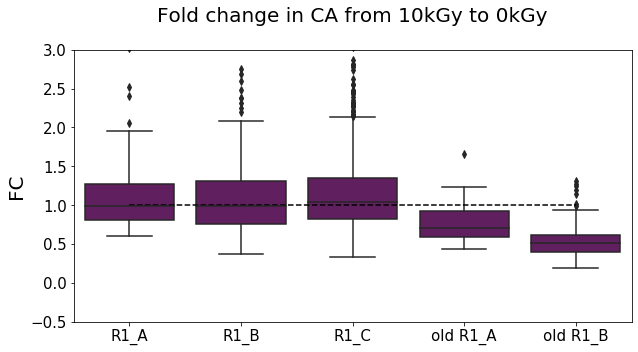

In [100]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
ax = sns.boxplot(data=[CA_809_r1_A_avg_FC_10k_0k,
                       CA_809_r1_B_avg_FC_10k_0k,
                       CA_809_r1_C_avg_FC_10k_0k,
                       CA_809_Or1_A_avg_FC_10k_0k,
                       CA_809_Or1_B_avg_FC_10k_0k],color="purple",saturation=0.5,showfliers=True)
plt.title("Fold change in CA from 10kGy to 0kGy\n")
#plt.xlabel("strain")
ax.set_xticklabels(["R1_A", "R1_B", "R1_C", "old R1_A", "old R1_B"],size=15)
plt.ylabel("FC")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

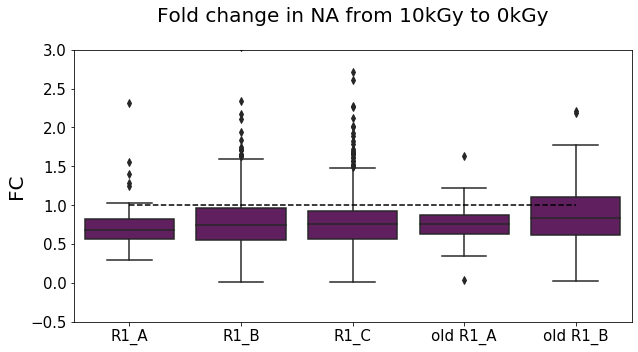

In [103]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_809_r1_A_avg_FC_10k_0k,
                       NA_809_r1_B_avg_FC_10k_0k,
                       NA_809_r1_C_avg_FC_10k_0k,
                       NA_809_Or1_A_avg_FC_10k_0k,
                       NA_809_Or1_B_avg_FC_10k_0k],color="purple",saturation=0.5,showfliers=True)
plt.title("Fold change in NA from 10kGy to 0kGy\n")
#plt.xlabel("strain")
ax.set_xticklabels(["R1_A", "R1_B", "R1_C", "old R1_A", "old R1_B"],size=15)
plt.ylabel("FC")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

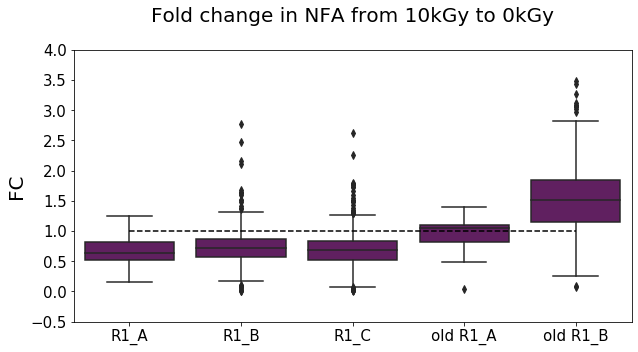

In [115]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
ax = sns.boxplot(data=[NFA_809_r1_A_avg_FC_10k_0k,
                       NFA_809_r1_B_avg_FC_10k_0k,
                       NFA_809_r1_C_avg_FC_10k_0k,
                       NFA_809_Or1_A_avg_FC_10k_0k,
                       NFA_809_Or1_B_avg_FC_10k_0k],color="purple",saturation=0.5,showfliers=True)
plt.title("Fold change in NFA from 10kGy to 0kGy\n")
#plt.xlabel("strain")
ax.set_xticklabels(["R1_A", "R1_B", "R1_C", "old R1_A", "old R1_B"],size=15)
plt.ylabel("FC")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,4])
ax.tick_params(axis='y', labelsize=15)

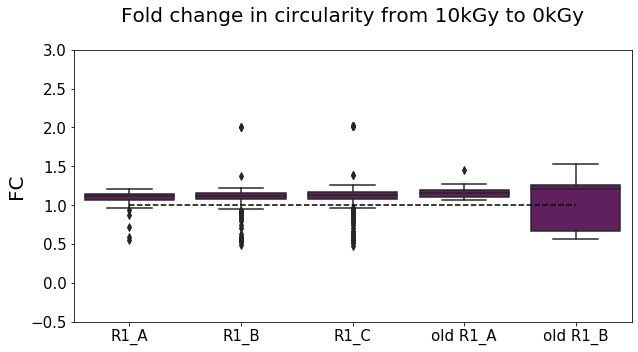

In [116]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_809_r1_A_avg_FC_10k_0k,
                       circ_809_r1_B_avg_FC_10k_0k,
                       circ_809_r1_C_avg_FC_10k_0k,
                       circ_809_Or1_A_avg_FC_10k_0k,
                       circ_809_Or1_B_avg_FC_10k_0k],color="purple",saturation=0.5,showfliers=True)
plt.title("Fold change in circularity from 10kGy to 0kGy\n")
#plt.xlabel("strain")
ax.set_xticklabels(["R1_A", "R1_B", "R1_C", "old R1_A", "old R1_B"],size=15)
plt.ylabel("FC")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

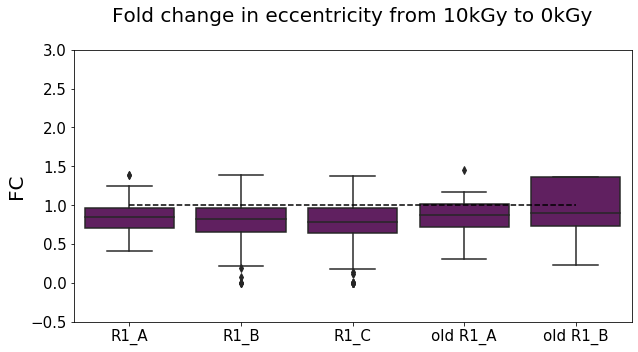

In [122]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_809_r1_A_avg_FC_10k_0k,
                       eccen_809_r1_B_avg_FC_10k_0k,
                       eccen_809_r1_C_avg_FC_10k_0k,
                       eccen_809_Or1_A_avg_FC_10k_0k,
                       eccen_809_Or1_B_avg_FC_10k_0k],color="purple",saturation=0.5,showfliers=True)
plt.title("Fold change in eccentricity from 10kGy to 0kGy\n")
#plt.xlabel("strain")
ax.set_xticklabels(["R1_A", "R1_B", "R1_C", "old R1_A", "old R1_B"],size=15)
plt.ylabel("FC")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3])
ax.tick_params(axis='y', labelsize=15)

In [23]:
r1_0k = [CA_809_r1_0k_avg,NA_809_r1_0k_avg,NFA_809_r1_0k_avg,circ_809_r1_0k_avg,eccen_809_r1_0k_avg]
Or1_0k = [CA_809_Or1_0k_avg,NA_809_Or1_0k_avg,NFA_809_Or1_0k_avg,circ_809_Or1_0k_avg,eccen_809_Or1_0k_avg]

r1_10k = [CA_809_r1_10k_avg,NA_809_r1_10k_avg,NFA_809_r1_10k_avg,circ_809_r1_10k_avg,eccen_809_r1_10k_avg]
Or1_10k = [CA_809_Or1_10k_avg,NA_809_Or1_10k_avg,NFA_809_Or1_10k_avg,circ_809_Or1_10k_avg,eccen_809_Or1_10k_avg]

r1_0k_err = [CA_809_r1_0k_avg_sterr,NA_809_r1_0k_avg_sterr,NFA_809_r1_0k_avg_sterr,circ_809_r1_0k_avg_sterr,eccen_809_r1_0k_avg_sterr]
Or1_0k_err = [CA_809_Or1_0k_avg_sterr,NA_809_Or1_0k_avg_sterr,NFA_809_Or1_0k_avg_sterr,circ_809_Or1_0k_avg_sterr,eccen_809_Or1_0k_avg_sterr]

r1_10k_err = [CA_809_r1_10k_avg_sterr,NA_809_r1_10k_avg_sterr,NFA_809_r1_10k_avg_sterr,circ_809_r1_10k_avg_sterr,eccen_809_r1_10k_avg_sterr]
Or1_10k_err = [CA_809_Or1_10k_avg_sterr,NA_809_Or1_10k_avg_sterr,NFA_809_Or1_10k_avg_sterr,circ_809_Or1_10k_avg_sterr,eccen_809_Or1_10k_avg_sterr]

r1 = pd.DataFrame(data={"r1_0k":r1_0k,"r1_0k_err":r1_0k_err,"Or1_0k":Or1_0k,"Or1_0k_err":Or1_0k_err,
                        "r1_10k":r1_10k,"r1_10k_err":r1_10k_err,"Or1_10k":Or1_10k,"Or1_10k_err":Or1_10k_err})
r1.to_excel("./r1_old_vs_new.xls",index=False)
print(CA_809_r1_0k_avg,CA_809_Or1_0k_avg,CA_809_r1_10k_avg,CA_809_Or1_10k_avg)

2.7485172531899633 3.402361292204299 3.2683840187764686 2.283742578634146


In [21]:
CA = [CA_809_r1_0k_avg,CA_809_Or1_0k_avg,CA_809_r1_10k_avg,CA_809_Or1_10k_avg]
CA_err = [CA_809_r1_0k_avg_sterr,CA_809_Or1_0k_avg_sterr,CA_809_r1_10k_avg_sterr,CA_809_Or1_10k_avg_sterr]

NA = [NA_809_r1_0k_avg,NA_809_Or1_0k_avg,NA_809_r1_10k_avg,NA_809_Or1_10k_avg]
NA_err = [NA_809_r1_0k_avg_sterr,NA_809_Or1_0k_avg_sterr,NA_809_r1_10k_avg_sterr,NA_809_Or1_10k_avg_sterr]

NFA = [NFA_809_r1_0k_avg,NFA_809_Or1_0k_avg,NFA_809_r1_10k_avg,NFA_809_Or1_10k_avg]
NFA_err = [NFA_809_r1_0k_avg_sterr,NFA_809_Or1_0k_avg_sterr,NFA_809_r1_10k_avg_sterr,NFA_809_Or1_10k_avg_sterr]

circ = [circ_809_r1_0k_avg,circ_809_Or1_0k_avg,circ_809_r1_10k_avg,circ_809_Or1_10k_avg]
circ_err = [circ_809_r1_0k_avg_sterr,circ_809_Or1_0k_avg_sterr,circ_809_r1_10k_avg_sterr,circ_809_Or1_10k_avg_sterr]

eccen = [eccen_809_r1_0k_avg,eccen_809_Or1_0k_avg,eccen_809_r1_10k_avg,eccen_809_Or1_10k_avg]
eccen_err = [eccen_809_r1_0k_avg_sterr,eccen_809_Or1_0k_avg_sterr,eccen_809_r1_10k_avg_sterr,eccen_809_Or1_10k_avg_sterr]

r1 = pd.DataFrame(data={"CA":CA,"CAerr":CA_err,"NA":NA,"NAerr":NA_err,
                        "NFA":NFA,"NFAerr":NFA_err,"circ":circ,"circerr":circ_err,"eccenerr":eccen_err})
r1.to_excel("./r1_old_vs_new.xls",index=False)

In [88]:
CA_bio = [CA_809_r1_0k_A_avg,CA_809_r1_0k_B_avg,CA_809_r1_0k_C_avg,CA_809_Or1_0k_A_avg,CA_809_Or1_0k_B_avg,
          CA_809_r1_10k_A_avg,CA_809_r1_10k_B_avg,CA_809_r1_10k_C_avg,CA_809_Or1_10k_A_avg,CA_809_Or1_10k_B_avg]
CA_bio_err = [CA_809_r1_0k_A_avg_sterr,CA_809_r1_0k_B_avg_sterr,CA_809_r1_0k_C_avg_sterr,CA_809_Or1_0k_A_avg_sterr,
              CA_809_Or1_0k_B_avg_sterr,CA_809_r1_10k_A_avg_sterr,CA_809_r1_10k_B_avg_sterr,CA_809_r1_10k_C_avg_sterr,
             CA_809_Or1_10k_A_avg_sterr,CA_809_Or1_10k_B_avg_sterr]
NA_bio = [NA_809_r1_0k_A_avg,NA_809_r1_0k_B_avg,NA_809_r1_0k_C_avg,NA_809_Or1_0k_A_avg,NA_809_Or1_0k_B_avg,
          NA_809_r1_10k_A_avg,NA_809_r1_10k_B_avg,NA_809_r1_10k_C_avg,NA_809_Or1_10k_A_avg,NA_809_Or1_10k_B_avg]
NA_bio_err = [NA_809_r1_0k_A_avg_sterr,NA_809_r1_0k_B_avg_sterr,NA_809_r1_0k_C_avg_sterr,NA_809_Or1_0k_A_avg_sterr,
              NA_809_Or1_0k_B_avg_sterr,NA_809_r1_10k_A_avg_sterr,NA_809_r1_10k_B_avg_sterr,NA_809_r1_10k_C_avg_sterr,
             NA_809_Or1_10k_A_avg_sterr,NA_809_Or1_10k_B_avg_sterr]
NFA_bio = [NFA_809_r1_0k_A_avg,NFA_809_r1_0k_B_avg,NFA_809_r1_0k_C_avg,NFA_809_Or1_0k_A_avg,NFA_809_Or1_0k_B_avg,
          NFA_809_r1_10k_A_avg,NFA_809_r1_10k_B_avg,NFA_809_r1_10k_C_avg,NFA_809_Or1_10k_A_avg,NFA_809_Or1_10k_B_avg]
NFA_bio_err = [NFA_809_r1_0k_A_avg_sterr,NFA_809_r1_0k_B_avg_sterr,NFA_809_r1_0k_C_avg_sterr,NFA_809_Or1_0k_A_avg_sterr,
              NFA_809_Or1_0k_B_avg_sterr,NFA_809_r1_10k_A_avg_sterr,NFA_809_r1_10k_B_avg_sterr,NFA_809_r1_10k_C_avg_sterr,
             NFA_809_Or1_10k_A_avg_sterr,NFA_809_Or1_10k_B_avg_sterr]
circ_bio = [circ_809_r1_0k_A_avg,circ_809_r1_0k_B_avg,circ_809_r1_0k_C_avg,circ_809_Or1_0k_A_avg,circ_809_Or1_0k_B_avg,
          circ_809_r1_10k_A_avg,circ_809_r1_10k_B_avg,circ_809_r1_10k_C_avg,circ_809_Or1_10k_A_avg,circ_809_Or1_10k_B_avg]
circ_bio_err = [circ_809_r1_0k_A_avg_sterr,circ_809_r1_0k_B_avg_sterr,circ_809_r1_0k_C_avg_sterr,circ_809_Or1_0k_A_avg_sterr,
              circ_809_Or1_0k_B_avg_sterr,circ_809_r1_10k_A_avg_sterr,circ_809_r1_10k_B_avg_sterr,circ_809_r1_10k_C_avg_sterr,
             circ_809_Or1_10k_A_avg_sterr,circ_809_Or1_10k_B_avg_sterr]
eccen_bio = [eccen_809_r1_0k_A_avg,eccen_809_r1_0k_B_avg,eccen_809_r1_0k_C_avg,eccen_809_Or1_0k_A_avg,eccen_809_Or1_0k_B_avg,
          eccen_809_r1_10k_A_avg,eccen_809_r1_10k_B_avg,eccen_809_r1_10k_C_avg,eccen_809_Or1_10k_A_avg,eccen_809_Or1_10k_B_avg]
eccen_bio_err = [eccen_809_r1_0k_A_avg_sterr,eccen_809_r1_0k_B_avg_sterr,eccen_809_r1_0k_C_avg_sterr,eccen_809_Or1_0k_A_avg_sterr,
              eccen_809_Or1_0k_B_avg_sterr,eccen_809_r1_10k_A_avg_sterr,eccen_809_r1_10k_B_avg_sterr,eccen_809_r1_10k_C_avg_sterr,
             eccen_809_Or1_10k_A_avg_sterr,eccen_809_Or1_10k_B_avg_sterr]

biorep_data = pd.DataFrame(data={"CA_bio":CA_bio,"CA_bioerr":CA_bio_err,"NA_bio":NA_bio,"NA_bioerr":NA_bio_err,
                        "NFA_bio":NFA_bio,"NFA_bioerr":NFA_bio_err,"circ_bio":circ_bio,"circ_bioerr":circ_bio_err,
                                 "eccen_bio":eccen_bio,"eccen_bioerr":eccen_bio_err})
biorep_data.to_excel("./r1_bioreps_old_vs_new.xls",index=False)

In [ ]:
eccen_bio = [eccen_809_r1_0k_A_avg,eccen_809_r1_0k_B_avg,eccen_809_r1_0k_C_avg,eccen_809_Or1_0k_A_avg,eccen_809_Or1_0k_B_avg,
          eccen_809_r1_10k_A_avg,eccen_809_r1_10k_B_avg,eccen_809_r1_10k_C_avg,eccen_809_Or1_10k_A_avg,eccen_809_Or1_10k_B_avg]
eccen_bio_err = [eccen_809_r1_0k_A_avg_sterr,eccen_809_r1_0k_B_avg_sterr,eccen_809_r1_0k_C_avg_sterr,eccen_809_Or1_0k_A_avg_sterr,
              eccen_809_Or1_0k_B_avg_sterr,eccen_809_r1_10k_A_avg_sterr,eccen_809_r1_10k_B_avg_sterr,eccen_809_r1_10k_C_avg_sterr,
             eccen_809_Or1_10k_A_avg_sterr,eccen_809_Or1_10k_B_avg_sterr]

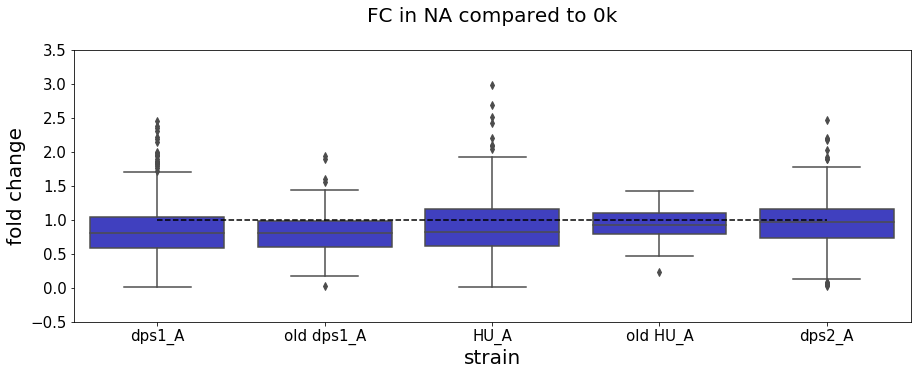

In [77]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[NA_809_dps1_A_avg_FC_10k_0k,
                       NA_809_Odps1_A_avg_FC_10k_0k,
                       NA_809_HU_A_avg_FC_10k_0k,
                       NA_809_OHU_A_avg_FC_10k_0k,
                       NA_809_dps2_A_avg_FC_10k_0k],color="blue",saturation=0.5,showfliers=True)
plt.title("FC in NA compared to 0k\n")
plt.xlabel("strain")
ax.set_xticklabels(["dps1_A", "old dps1_A", "HU_A", "old HU_A", "dps2_A"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3.5])
ax.tick_params(axis='y', labelsize=15)

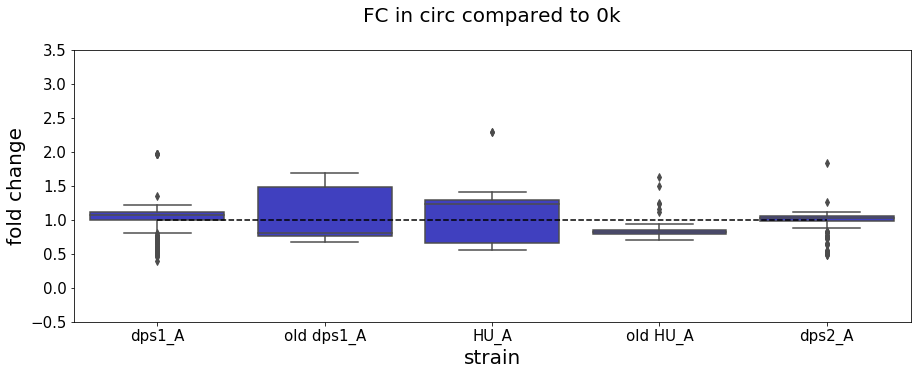

In [78]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[circ_809_dps1_A_avg_FC_10k_0k,
                       circ_809_Odps1_A_avg_FC_10k_0k,
                       circ_809_HU_A_avg_FC_10k_0k,
                       circ_809_OHU_A_avg_FC_10k_0k,
                       circ_809_dps2_A_avg_FC_10k_0k],color="blue",saturation=0.5,showfliers=True)
plt.title("FC in circ compared to 0k\n")
plt.xlabel("strain")
ax.set_xticklabels(["dps1_A", "old dps1_A", "HU_A", "old HU_A", "dps2_A"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3.5])
ax.tick_params(axis='y', labelsize=15)

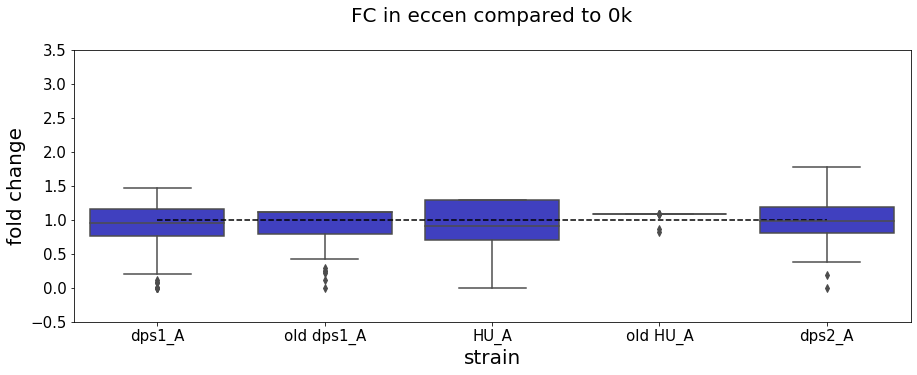

In [79]:
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)
ax = sns.boxplot(data=[eccen_809_dps1_A_avg_FC_10k_0k,
                       eccen_809_Odps1_A_avg_FC_10k_0k,
                       eccen_809_HU_A_avg_FC_10k_0k,
                       eccen_809_OHU_A_avg_FC_10k_0k,
                       eccen_809_dps2_A_avg_FC_10k_0k],color="blue",saturation=0.5,showfliers=True)
plt.title("FC in eccen compared to 0k\n")
plt.xlabel("strain")
ax.set_xticklabels(["dps1_A", "old dps1_A", "HU_A", "old HU_A", "dps2_A"],size=15)
plt.ylabel("fold change")
plt.plot([1,1,1,1,1], "--", color = "black")
plt.ylim([-0.5,3.5])
ax.tick_params(axis='y', labelsize=15)